In [1]:
import pydataset

In [2]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips = tips.rename(columns={'size': 'party_size'})

In [9]:
# .max is a method, a function that lives on the dataframe
tips.max()
# .size and .shape are properties
tips.size
tips.shape

total_bill             50.81
tip                       10
sex                     Male
smoker                   Yes
day                     Thur
time                   Lunch
party_size                 6
tip_percentage      0.710345
price_per_person      20.275
dtype: object

In [5]:
tips['tip_percentage'] = tips.tip / tips.total_bill
tips['price_per_person'] = tips.total_bill / tips.party_size

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,party_size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500


In [8]:
import sklearn.linear_model
import sklearn.feature_selection

# Where is k coming from?
k = 2

# initialize the sklearn objects
lm = sklearn.linear_model.LinearRegression()
kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_regression, 2)

rfe = sklearn.feature_selection.RFE(lm, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [9]:
# prep our data
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(tips, random_state=123, train_size=.80)

x_cols = ['total_bill', 'party_size', 'tip_percentage', 'price_per_person']
X_train = train[x_cols]
y_train = train.tip

X_test = test[x_cols]
y_test = test.tip

How to use scikit-learn objects:

1. Make the thing
2. Fit the thing (`.fit`) on the training data
3. Use the thing (`.tranform`, `.predict`) on the training data or the test data, or even unseen data

In [10]:
kbest.fit(X_train, y_train)
X_train.columns[kbest.get_support()]

Index(['total_bill', 'party_size'], dtype='object')

In [12]:
rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['total_bill', 'tip_percentage'], dtype='object')

In [13]:
rfe.support_

array([ True, False,  True, False])

In [14]:
X_train.columns.tolist()

['total_bill', 'party_size', 'tip_percentage', 'price_per_person']

In [15]:
X_train.columns[rfe.support_]

Index(['total_bill', 'tip_percentage'], dtype='object')

In [17]:
X_train.head(3)

,total_bill,party_size,tip_percentage,price_per_person
24,39.42,4,0.192288,9.855
191,15.69,2,0.095602,7.845
210,12.76,2,0.174765,6.380


In [18]:
# exploring what .transform does
X_train
X_train_kbest_features = kbest.transform(X_train)

In [20]:
X_train_kbest_features[0:5]

array([[39.42,  4.  ],
       [15.69,  2.  ],
       [12.76,  2.  ],
       [10.27,  2.  ],
       [10.34,  2.  ]])

In [21]:
def select_kbest(X, y, k):
    kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_regression, k)
    kbest.fit(X, y)
    return X.columns[kbest.get_support()]

In [22]:
select_kbest(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['total_bill', 'party_size'], dtype='object')

In [23]:
def select_rfe(X, y, k):
    lm = sklearn.linear_model.LinearRegression()
    rfe = sklearn.feature_selection.RFE(lm, k)
    rfe.fit(X, y)
    return X.columns[rfe.support_]

In [24]:
select_rfe(X_train, y_train, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['total_bill', 'tip_percentage'], dtype='object')

In [25]:
swiss = pydataset.data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [27]:
train, test = sklearn.model_selection.train_test_split(swiss, random_state=123, train_size=.8)

X_train = train.drop(columns='Fertility')
y_train = train.Fertility

X_test = test.drop(columns='Fertility')
y_test = test.Fertility

In [28]:
select_kbest(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['Examination', 'Education', 'Catholic'], dtype='object')

In [29]:
select_rfe(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')

In [30]:
lm.fit(X_train, y_train)

lm.coef_

array([-0.21156852, -0.39409426, -0.92225189,  0.12007924,  1.68540012])

In [31]:
import seaborn as sns

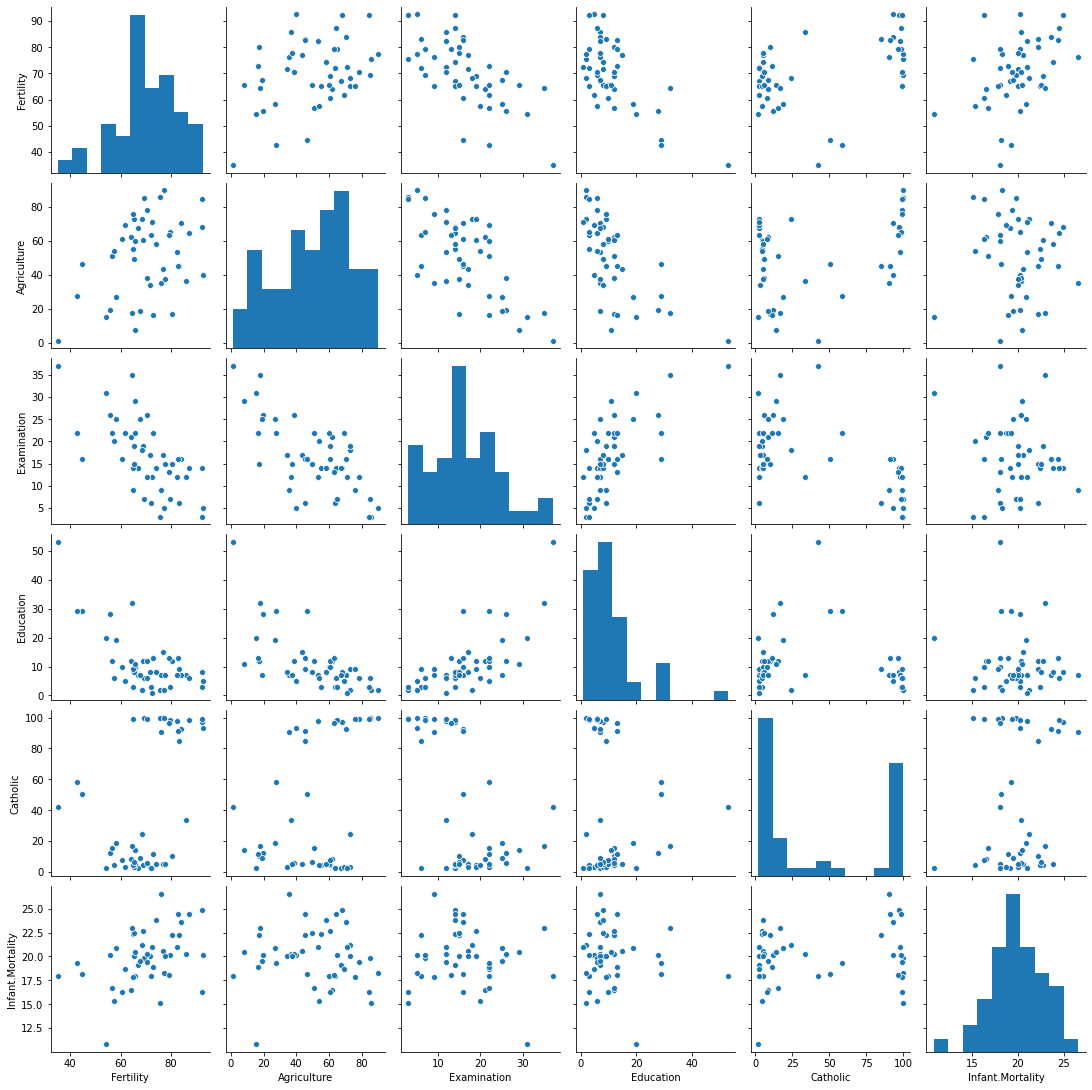

In [32]:
sns.pairplot(data=swiss)

## Best Practices
- Scale your numeric columns 
- Split your data into train, validate, test so we have not one, but two "out-of-sample" datasets